1.	数据集准备。数据集“产品评价.xlsx”收集了某电商平台上销售的iPhone XR的1080条评价，其中有600条好评，480条差评。
2.	中文分词。提示：该数据集中的评论为文本数据，不能直接拿来训练，需要将文本分词，构建词频矩阵，再用来拟合模型。可以利用jieba库 的cut()可以进行中文分词。
3.	特征提取。提示：使用sklearn.feature_extraction.text中CountVectorizer的fit_transform()将分词结果进行文本向量化，以构造特征变量。
4.	模型训练。提示：使用train_test_split()将数据拆分为训练集和测试集，使用sklearn.neural_network.MLPClassifier的fit()进行模型训练。
5.	模型预测。提示：使用predict()进行预测，使用sklearn.metrics.accuracy_score对预测结果进行评估。
6.	结果分析。

In [ ]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:

# 1. 数据集准备
data = pd.read_excel('产品评价.xlsx')  # 读取数据集
data.columns = ['ID', 'Comment', 'Label']  # 假设列名为 ID, Comment, Label

# 2. 中文分词
data['Segmented'] = data['Comment'].apply(lambda x: " ".join(jieba.cut(x)))
print(data['Segmented'])

0       是 iPhone8   XR 正品 ， 按键 屏幕 反应 蛮快 的 很 灵活 ， 屏幕 6....
1       外形 外观 ： 外光 非常 漂亮 ， 黑色 的 非常 大气 。 适合 男士 拥有 。 屏幕 ...
2       从 苹果 4s ， 到 6s ， 再 到 xr ， 就是 喜欢 苹果 的 手感 和 风格 ，...
3       主要 是 手感 ， 太沉 了 ， 比 苹果 6 ， 沉 一倍 ， 厚太多 了 ， 看中 双卡...
4       外形 外观 ： 红色 超级 好看 ， 送 妈妈 的 。 屏幕 音效 ： 音效 还 可以 ， ...
                              ...                        
1075              五月 三号 四号 买 的 玩 了 十天 一天 要 多花 二十块 感谢 # 好评
1076                勉强 用 着 吧 ， 吃一堑长一智 ， 不想 说 多 了 ， 都 没用 。
1077    这样 的 包装 给 一星 ！ 还好 手机 没什么 问题 ！ 速度 很快 ， 国产机 是 做 ...
1078                                     有意思   买 了 个 翻新 机
1079    拍照 不错 ， 手机 续航 也 强大 ， A12 ， 双卡 双待 ， 不过 京东 这次 购物...
Name: Segmented, Length: 1080, dtype: object


In [12]:

# 3. 特征提取
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Segmented'])  # 分词后的评论向量化
y = data['Label']  # 评价标签

# 4. 模型训练
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 拆分训练集和测试集
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)  # 创建并配置MLP分类器
clf.fit(X_train, y_train)  # 训练模型




MLPClassifier(max_iter=300, random_state=42)

In [4]:

# 4. 模型训练
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 拆分训练集和测试集
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)  # 创建并配置MLP分类器
clf.fit(X_train, y_train)  # 训练模型


MLPClassifier(max_iter=300, random_state=42)

模型准确率: 93.98%
分类报告:
               precision    recall  f1-score   support

          差评       0.89      0.98      0.93        91
          好评       0.98      0.91      0.95       125

    accuracy                           0.94       216
   macro avg       0.94      0.95      0.94       216
weighted avg       0.94      0.94      0.94       216



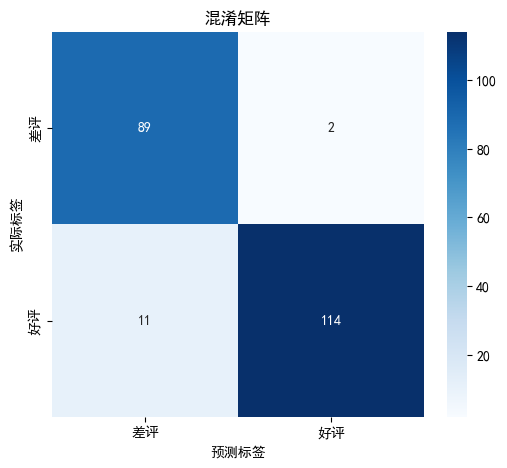

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置字体为SimHei，避免中文乱码
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 避免负号显示为方块

# 示例：绘制混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['差评', '好评'], yticklabels=['差评', '好评'])
plt.xlabel('预测标签')
plt.ylabel('实际标签')
plt.title('混淆矩阵')
plt.show()
